In [15]:
%matplotlib inline
import cv2
import numpy as np
import scipy
import matplotlib.pyplot as plt
import os
import json


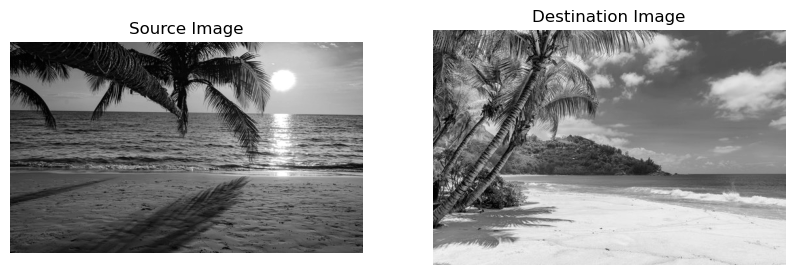

In [16]:
# Setting the paths for the source and target image
img_folder_path = os.path.join(os.getcwd(),"Images")
src_img_path = os.path.join(img_folder_path, "source.jpeg")
dest_img_path = os.path.join(img_folder_path, "target.jpeg")

# Storing the images as numpy arrays
src_img = cv2.imread(src_img_path, cv2.IMREAD_GRAYSCALE)
dest_img = cv2.imread(dest_img_path, cv2.IMREAD_GRAYSCALE)

# Create a figure and a set of subplots
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Plot the source image
axes[0].imshow(src_img, cmap='gray')
axes[0].set_title('Source Image')
axes[0].axis('off')  # Turn off axis numbers and ticks

# Plot the destination image
axes[1].imshow(dest_img, cmap='gray')
axes[1].set_title('Destination Image')
axes[1].axis('off')

plt.show()

Mask saved as 'polygon_mask.jpg'


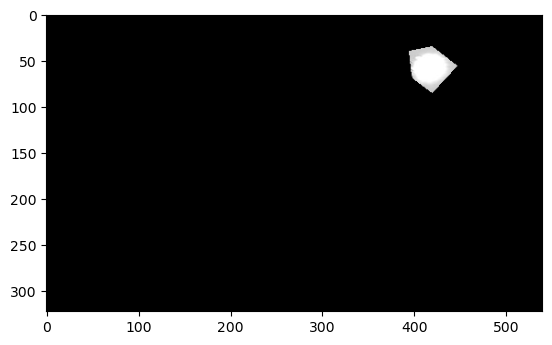

In [17]:
!python select_region.py "{src_img_path}"

# Read the saved region coordinates
with open('selected_polygon.json', 'r') as file:
    polygon_points = json.load(file)

polygon_points = np.array(polygon_points, dtype=np.int32)

# Create a mask with the same dimensions as the source image
mask = np.zeros_like(src_img)
cv2.fillPoly(mask, [polygon_points], 255)

# Extract the region of interest
selected_region = cv2.bitwise_and(src_img, mask)

mask_img_path = os.path.join(img_folder_path, 'polygon_mask.jpg')
mask_path = os.path.join(img_folder_path, 'mask.jpg')
cv2.imwrite(mask_img_path, selected_region)
cv2.imwrite(mask_path,mask)
print("Mask saved as 'polygon_mask.jpg'")

# Display the extracted region
plt.imshow(selected_region, cmap='gray')
plt.show()

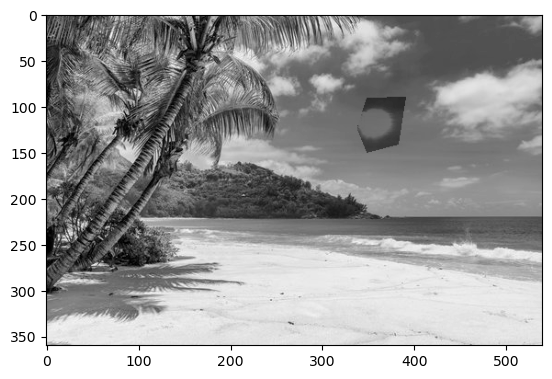

In [12]:
import mask_mover

result_path = os.path.join(img_folder_path,"target_mask.jpg")

offset = mask_mover.move_mask(dest_img_path, "selected_polygon.json", result_path)
target_mask_img = cv2.imread(result_path, cv2.IMREAD_GRAYSCALE)
def translate_mask(mask, offset):
    """
    Translate a binary mask by a given offset.
    """
    # Create the translation matrix
    M = np.float32([[1, 0, offset[0]], [0, 1, offset[1]]])
    
    # Translate the mask
    translated_mask = cv2.warpAffine(mask, M, (mask.shape[1], mask.shape[0]))
    return translated_mask

def pad_array_to_match(target_array, array_to_pad):

    # Calculate the padding required for each dimension
    padding = [(0, max(0, t - s)) for s, t in zip(array_to_pad.shape, target_array.shape)]

    # Pad the array
    padded_array = np.pad(array_to_pad, pad_width=padding, mode='constant', constant_values=0)

    return padded_array

new_mask = translate_mask(selected_region, offset)
new_mask = pad_array_to_match(dest_img, new_mask)
final_image = (dest_img) + new_mask
plt.imshow(final_image, cmap="gray")
plt.show()